In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!ls

sample_data  spam.csv


In [ ]:
!head spam.csv

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim 

In [ ]:
df = pd.read_csv("spam.csv", encoding= "ISO-8859-1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis =1 )

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns = ["label","data"]

In [ ]:
df.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df["n_label"] = df["label"].map({"ham":0,"spam":1})

In [ ]:
type(df["label"].map({"ham":0,"spam":1}))

pandas.core.series.Series

In [ ]:
df.head()

,label,data,n_label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df_train, df_test = train_test_split(df,test_size=0.33)

In [ ]:
df_train.shape,df_test.shape

((3733, 3), (1839, 3))

In [ ]:
df_train.head()

,label,data,n_label
3608,ham,Joy's father is John. Then John is the ____ of...,0
3766,ham,"Sir Goodmorning, Once free call me.",0
1450,ham,Msg me when rajini comes.,0
2380,ham,"If i let you do this, i want you in the house ...",0
226,spam,Will u meet ur dream partner soon? Is ur caree...,1


In [ ]:
# import spacy
# nlp = spacy.load("en_core_web_sm")

In [ ]:

#tokenization


word2idx = {"pad":0}


count = 1
for i, row in df_train.iterrows():


  split_data = row["data"].lower().split()

  for w in split_data:
    if w not in word2idx:

      word2idx[w]= count
      count+=1




In [ ]:
print(word2idx)

{'pad': 0, "joy's": 1, 'father': 2, 'is': 3, 'john.': 4, 'then': 5, 'john': 6, 'the': 7, '____': 8, 'of': 9, 'father.': 10, 'if': 11, 'u': 12, 'ans': 13, 'ths': 14, 'you': 15, 'hav': 16, '&lt;#&gt;': 17, 'iq.': 18, 'tis': 19, 's': 20, 'ias': 21, 'question': 22, 'try': 23, 'to': 24, 'answer.': 25, 'sir': 26, 'goodmorning,': 27, 'once': 28, 'free': 29, 'call': 30, 'me.': 31, 'msg': 32, 'me': 33, 'when': 34, 'rajini': 35, 'comes.': 36, 'i': 37, 'let': 38, 'do': 39, 'this,': 40, 'want': 41, 'in': 42, 'house': 43, 'by': 44, '8am.': 45, 'will': 46, 'meet': 47, 'ur': 48, 'dream': 49, 'partner': 50, 'soon?': 51, 'career': 52, 'off': 53, '2': 54, 'a': 55, 'flyng': 56, 'start?': 57, 'find': 58, 'out': 59, 'free,': 60, 'txt': 61, 'horo': 62, 'followed': 63, 'star': 64, 'sign,': 65, 'e.': 66, 'g.': 67, 'aries': 68, 'do,': 69, 'gonna': 70, 'be': 71, 'at': 72, "blake's": 73, 'all': 74, 'night?': 75, 'might': 76, 'able': 77, 'get': 78, 'here': 79, 'little': 80, 'early': 81, 'arr': 82, 'birthday': 83,

In [ ]:

word2idx['also']

347

In [ ]:
doc_list = []
for i,row in df_train.iterrows():
  a = [word2idx[token] for token in row["data"].lower().split()]
  doc_list.append(a)


In [ ]:
# list(nlp("Lol no ouch but wish i'd stayed out a bit longer".lower()))

In [ ]:
len(word2idx)

10429

In [ ]:
doc_list[1]

[26, 27, 28, 29, 30, 31]

In [ ]:
df_train.head()

,label,data,n_label
3608,ham,Joy's father is John. Then John is the ____ of...,0
3766,ham,"Sir Goodmorning, Once free call me.",0
1450,ham,Msg me when rajini comes.,0
2380,ham,"If i let you do this, i want you in the house ...",0
226,spam,Will u meet ur dream partner soon? Is ur caree...,1


In [ ]:
doc_list_test = []
for i,row in df_test.iterrows():
  a = [word2idx[token] for token in row["data"].lower().split() if token in word2idx]
  doc_list_test.append(a)


In [ ]:
len(doc_list),len(doc_list_test)

(3733, 1839)

In [ ]:
#Data generation

def datagen(X,y):

  batch_size = 32
  n_batches = int(np.ceil(len(y)/batch_size))

  for i in range(n_batches):
    end = min((i+1)*batch_size,len(y))
    X_batch = X[i*batch_size:end]
    Y_batch = y[i*batch_size:end]

    max_len = np.max([len(i) for i in X_batch])

    for i in range(len(X_batch)):
      X_batch[i] = [0]*(max_len - len(X_batch[i])) + X_batch[i]

    X_batch = torch.from_numpy(np.array(X_batch)).long()
    Y_batch = torch.from_numpy(np.array(Y_batch)).long()

    yield X_batch, Y_batch




In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
#Model

class LSTM(nn.Module):
  def __init__(self, n_vocab, embed_dim, n_hidden, n_layers, n_outputs):
    super(LSTM,self).__init__()

    self.D = embed_dim
    self.V = n_vocab
    self.M = n_hidden
    self.L = n_layers
    self.K = n_outputs

    self.embed = nn.Embedding(self.V,self.D)


    self.lstm = nn.LSTM(input_size = self.D, hidden_size = self.M, num_layers = self.L,batch_first = True)

    self.fc = nn.Linear(self.M,self.K)

  def forward(self,x):

    h_0 = torch.zeros(self.L,x.size(0),self.M).to(device)
    c_0 = torch.zeros(self.L,x.size(0),self.M).to(device)

    out = self.embed(x)
    out,_ = self.lstm(out,(h_0,c_0))

    out,_ = torch.max(out,1)

    out = self.fc(out)

    return out





In [ ]:
model = LSTM(len(word2idx),20,15,1,1)

In [ ]:
#optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
model.to(device)

LSTM(
  (embed): Embedding(10429, 20)
  (lstm): LSTM(20, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=1, bias=True)
)

In [ ]:
traingen = lambda: datagen(doc_list, df_train.n_label)
testgen = lambda: datagen(doc_list_test, df_test.n_label)

In [ ]:
for inputs,targets in traingen():
  print(inputs.shape,targets.shape)
  break

torch.Size([32, 37]) torch.Size([32])


In [ ]:
#training

epochs = 16
train_loss_1 = np.zeros(epochs)
test_loss_1 = np.zeros(epochs)

for i in range(epochs):


  t_0 = datetime.now()
  loss_t = []
  for inputs,targets in traingen():

    targets = targets.view(-1,1).float()

    inputs,targets = inputs.to(device), targets.to(device)

    optimizer.zero_grad()

    outputs = model(inputs)

    loss_train = criterion(outputs,targets)

    loss_train.backward()

    optimizer.step()

    loss_t.append(loss_train.item())

  train_loss = np.mean(loss_t)
  train_loss_1[i] = train_loss

  loss_test1 = []

  for inputs,targets in testgen():
    targets = targets.view(-1,1).float()

    inputs,targets = inputs.to(device), targets.to(device)

    outputs = model(inputs)

    loss_test = criterion(outputs,targets)



    loss_test1.append(loss_test.item())

  test_loss = np.mean(loss_test1)
  test_loss_1[i] = test_loss

  dt = datetime.now() - t_0
  print(f"epoch -- {i+1}/{epochs}, training loss -- {train_loss}, test loss -- {test_loss}, Duration -- {dt}")











epoch -- 1/16, training loss -- 0.46783686282797754, test loss -- 0.397099821731962, Duration -- 0:00:00.739178
epoch -- 2/16, training loss -- 0.33134848904660624, test loss -- 0.3289041354738433, Duration -- 0:00:00.541358
epoch -- 3/16, training loss -- 0.24958935984943667, test loss -- 0.24987928492241893, Duration -- 0:00:00.723192
epoch -- 4/16, training loss -- 0.17634562004962537, test loss -- 0.19579396730866924, Duration -- 0:00:00.689531
epoch -- 5/16, training loss -- 0.12520082839406455, test loss -- 0.15851892158389091, Duration -- 0:00:00.840753
epoch -- 6/16, training loss -- 0.09568941975251222, test loss -- 0.1454413054061347, Duration -- 0:00:00.847755
epoch -- 7/16, training loss -- 0.07661375674044985, test loss -- 0.13902201092448727, Duration -- 0:00:00.914736
epoch -- 8/16, training loss -- 0.06266003470613152, test loss -- 0.14148682696295195, Duration -- 0:00:00.799612
epoch -- 9/16, training loss -- 0.053134288949271045, test loss -- 0.13806604622895347, Dura

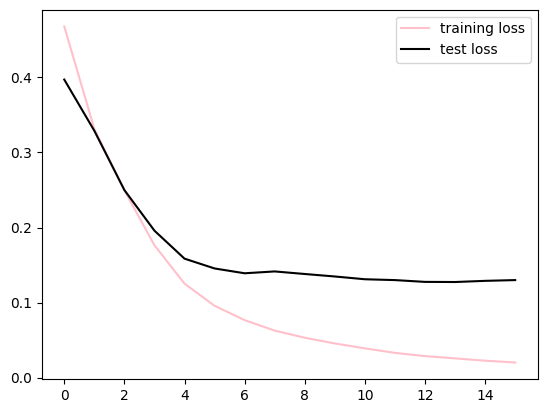

In [ ]:
plt.plot(train_loss_1,label = "training loss",c = "pink")
plt.plot(test_loss_1,label = "test loss", c = "black")
plt.legend()
plt.show()

In [ ]:
n_correct = 0
n_total = 0

for inputs, targets in traingen():

  targets = targets.view(-1,1).float()

  inputs,targets = inputs.to(device), targets.to(device)

  outputs = model(inputs)

  predictions = (outputs>0)

  n_correct += (predictions == targets).sum().item()

  n_total += len(targets)

train_acc = n_correct/n_total

n_correct_1 = 0
n_total_1 = 0


for inputs, targets in testgen():

  targets = targets.view(-1,1).float()

  inputs,targets = inputs.to(device), targets.to(device)

  outputs = model(inputs)

  predictions = (outputs>0)

  n_correct_1 += (predictions == targets).sum().item()

  n_total_1 += len(targets)

test_acc = n_correct_1/n_total_1


print(f"train acc -- {train_acc}, test acc -- {test_acc}" )


train acc -- 0.99732118939191, test acc -- 0.9695486677542142


In [ ]:
#Making Predictions

df_test.tail()


,label,data,n_label
632,ham,Oh that was a forwarded message. I thought you...,0
893,ham,It's ok i noe u're busy but i'm really too bor...,0
604,ham,Meet after lunch la...,0
4241,spam,Show ur colours! Euro 2004 2-4-1 Offer! Get an...,1
4534,ham,IM LATE TELLMISS IM ON MY WAY,0


In [ ]:
sample  = df_test["data"][4241]

In [ ]:
tokens_sample =  [word2idx[i] for i in sample.lower().split() if i in word2idx]

In [ ]:
tokens_sample

[1375,
 48,
 1938,
 1043,
 7747,
 78,
 926,
 974,
 978,
 460,
 982,
 400,
 48,
 4718,
 9526,
 400,
 7,
 398,
 261,
 193]

In [ ]:
tokens_sample_ =  [i for i in sample.lower().split()]
tokens_sample_

['show',
 'ur',
 'colours!',
 'euro',
 '2004',
 '2-4-1',
 'offer!',
 'get',
 'an',
 'england',
 'flag',
 '&',
 '3lions',
 'tone',
 'on',
 'ur',
 'phone!',
 'click',
 'on',
 'the',
 'following',
 'service',
 'message',
 'for',
 'info!']

In [ ]:
tokens_sample = torch.from_numpy(np.array(tokens_sample)).long()

In [ ]:
tokens_sample.shape


torch.Size([20])

In [ ]:
tokens_sample = tokens_sample.reshape(1,tokens_sample.size(0))

In [ ]:
tokens_sample.shape

torch.Size([1, 20])

In [ ]:
tokens_sample = tokens_sample.to(device)

In [ ]:
tokens_sample.shape

torch.Size([1, 20])

In [ ]:
prediction = model(tokens_sample)

In [ ]:
prediction

tensor([[4.5841]], device='cuda:0', grad_fn=<AddmmBackward0>)